In [ ]:
import yfinance as yf
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

end = datetime.now()

start = datetime(end.year-20,end.month,end.day)

print(start)
print(end)

2004-08-20 00:00:00
2024-08-20 08:29:53.262139


In [ ]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)
google_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-13,165.184998,166.539993,164.770004,165.929993,165.929993,12717600
2024-08-14,164.210007,164.960007,159.529999,162.029999,162.029999,22515900
2024-08-15,162.210007,163.520004,161.490005,163.169998,163.169998,18392500
2024-08-16,163.410004,166.949997,163.080002,164.740005,164.740005,16853100
2024-08-19,167.000000,168.470001,166.089996,168.399994,168.399994,13076600


In [ ]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,45.592640,46.075698,45.138410,45.616719,45.566827,1.153298e+08
std,43.735455,44.224376,43.310533,43.775940,43.732088,1.492806e+08
min,2.470490,2.534002,2.464263,2.490913,2.488082,1.584340e+05
25%,13.039624,13.150708,12.907619,13.070509,13.055653,2.725600e+07
50%,27.007500,27.259159,26.855499,27.039000,27.008265,5.498400e+07
75%,60.400002,61.063999,60.110001,60.514000,60.445217,1.419942e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [ ]:
google_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Adj Close')

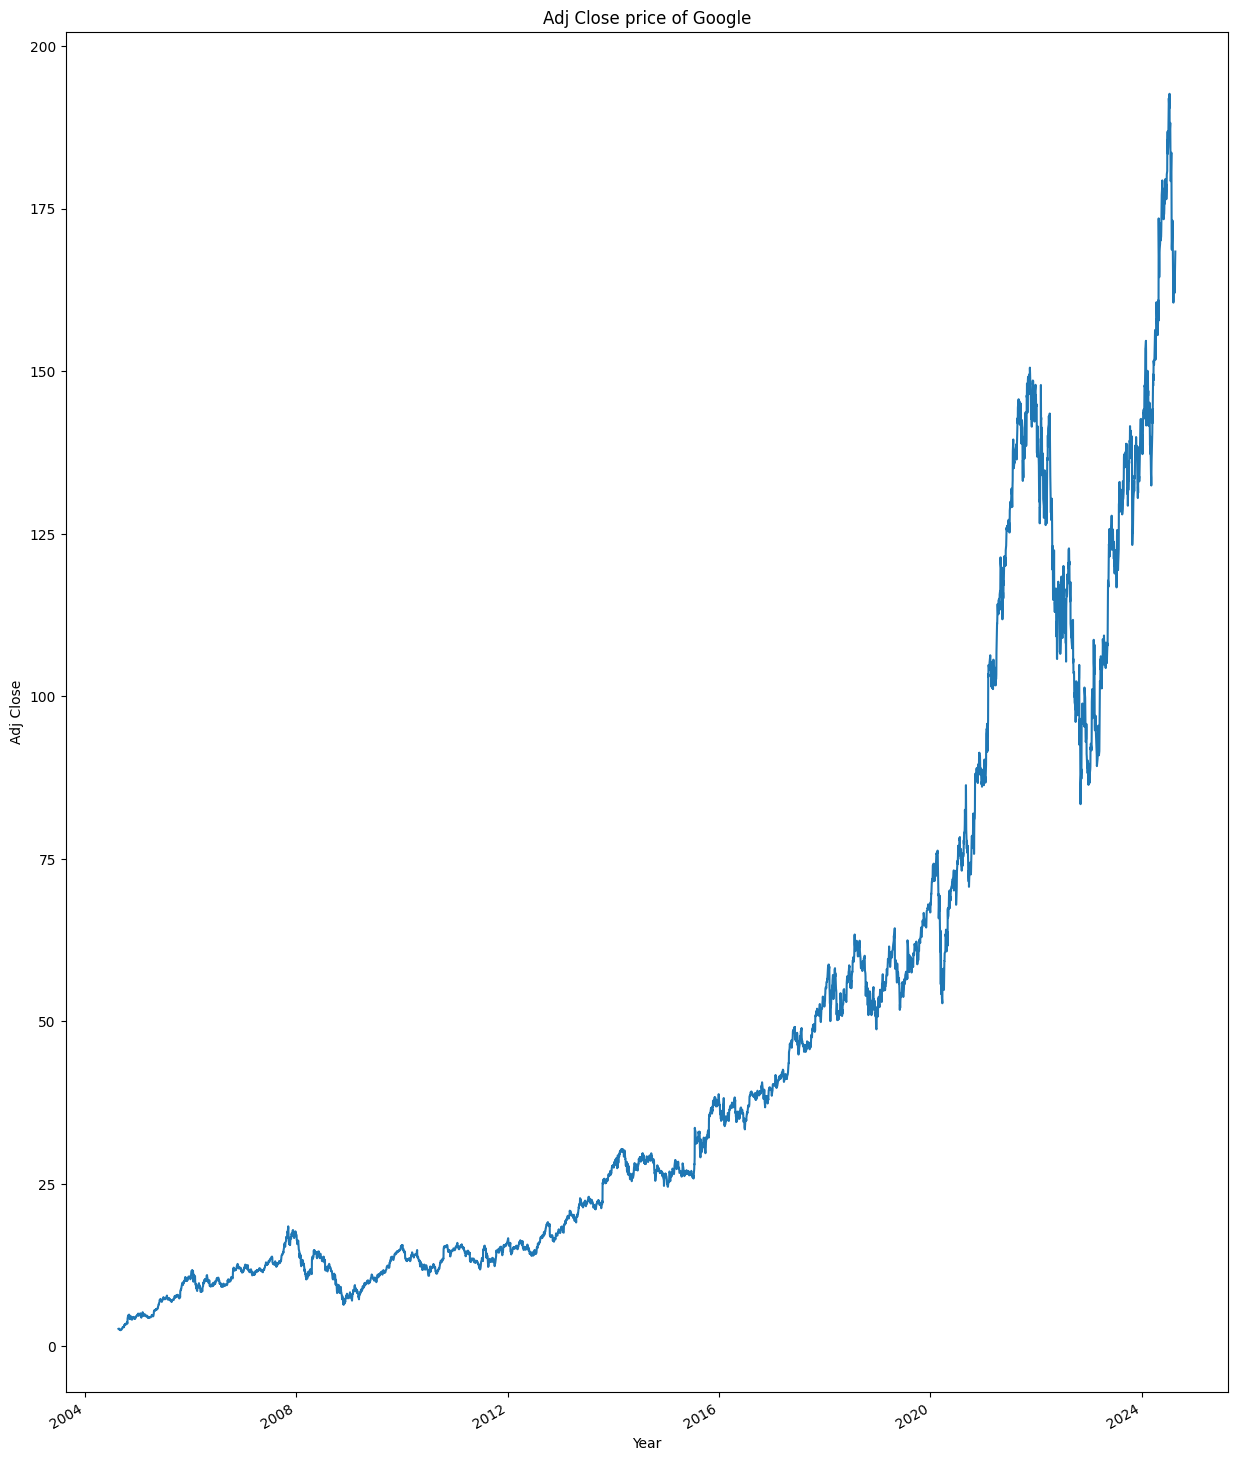

In [ ]:
plt.figure(figsize=(15,20))
google_data['Adj Close'].plot()
plt.title('Adj Close price of Google')
plt.xlabel('Year')
plt.ylabel('Adj Close')

In [ ]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.title(f'{column_name} price of Google')
    plt.xlabel('Year')
    plt.ylabel(column_name)

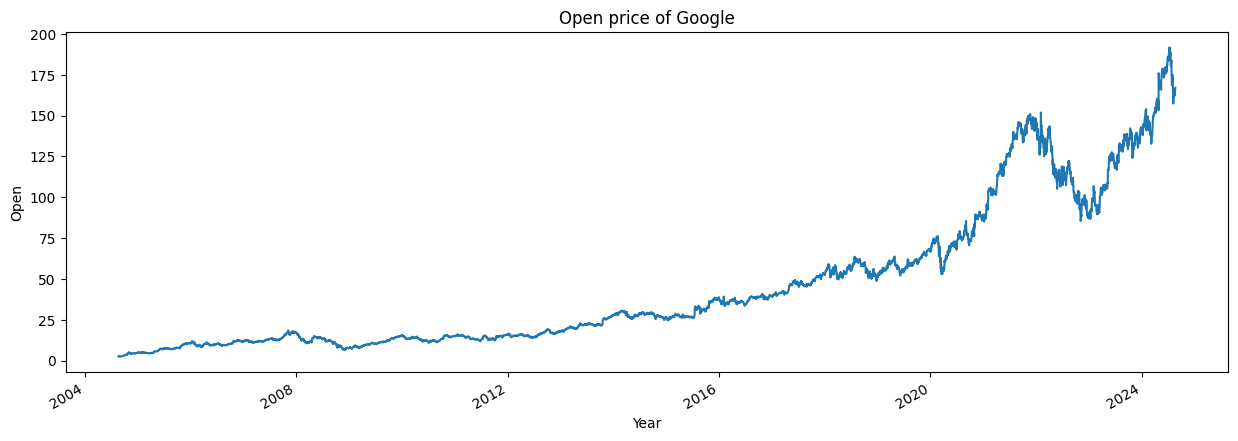

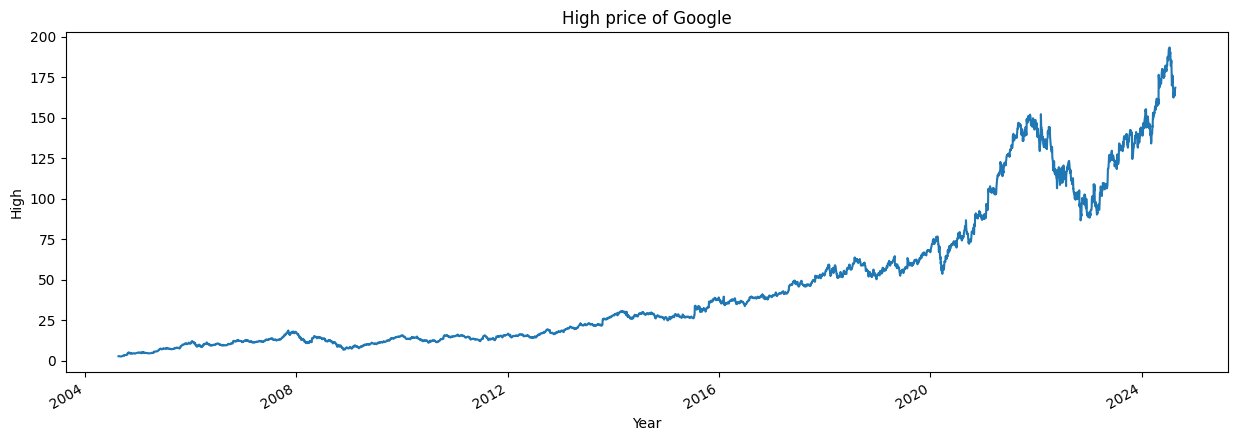

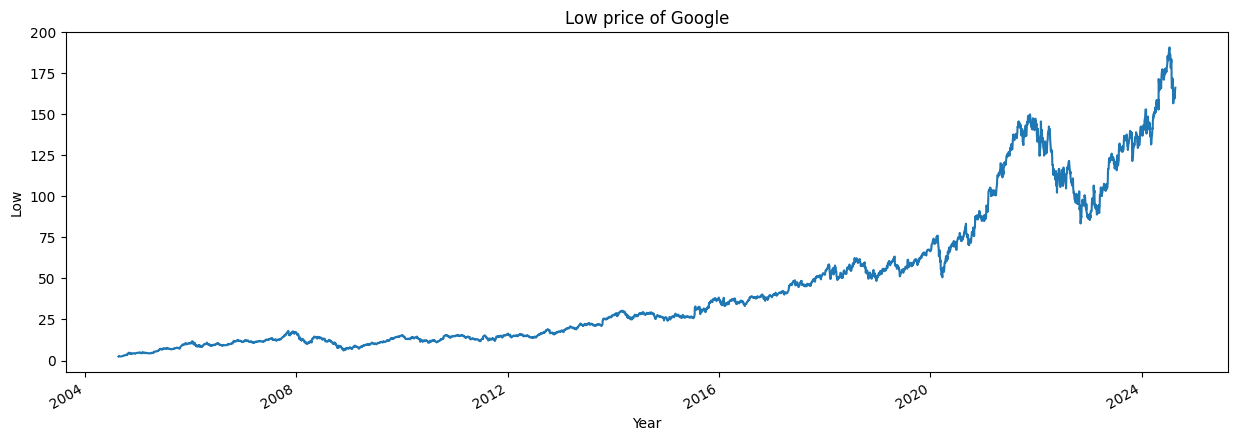

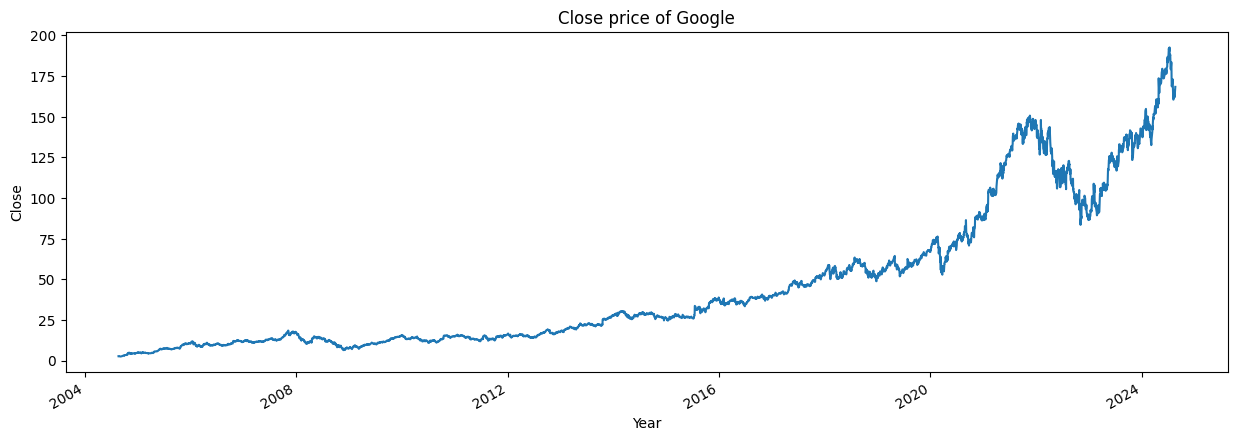

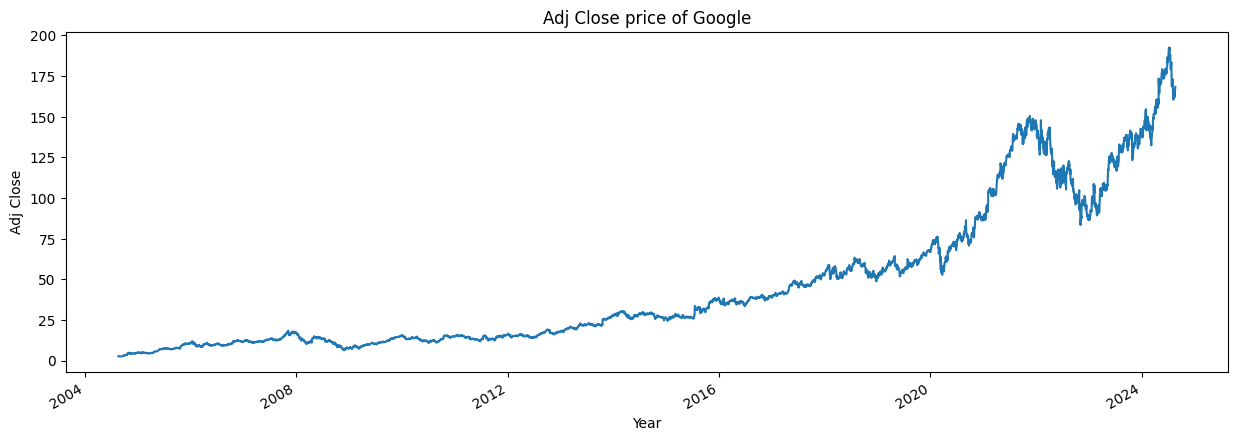

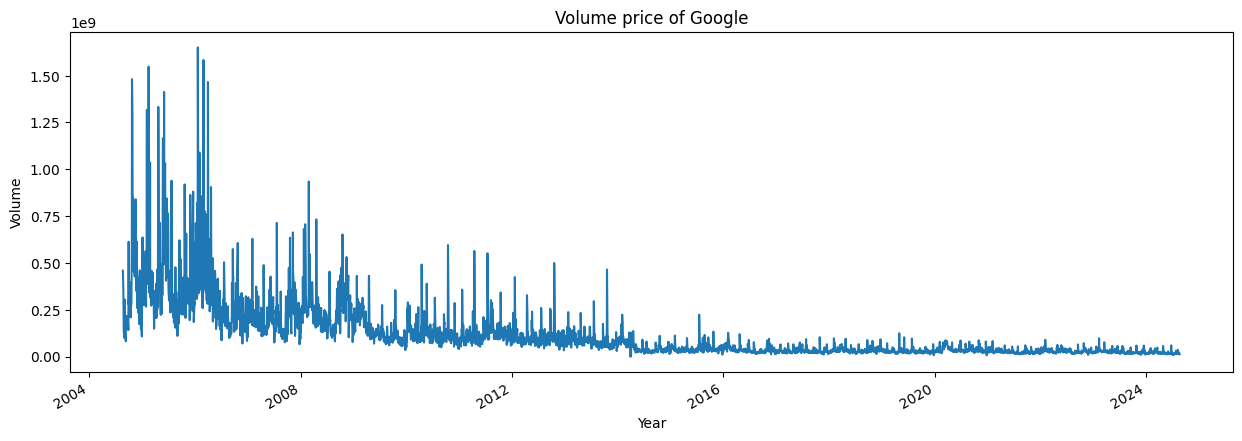

In [ ]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

<Figure size 640x480 with 0 Axes>

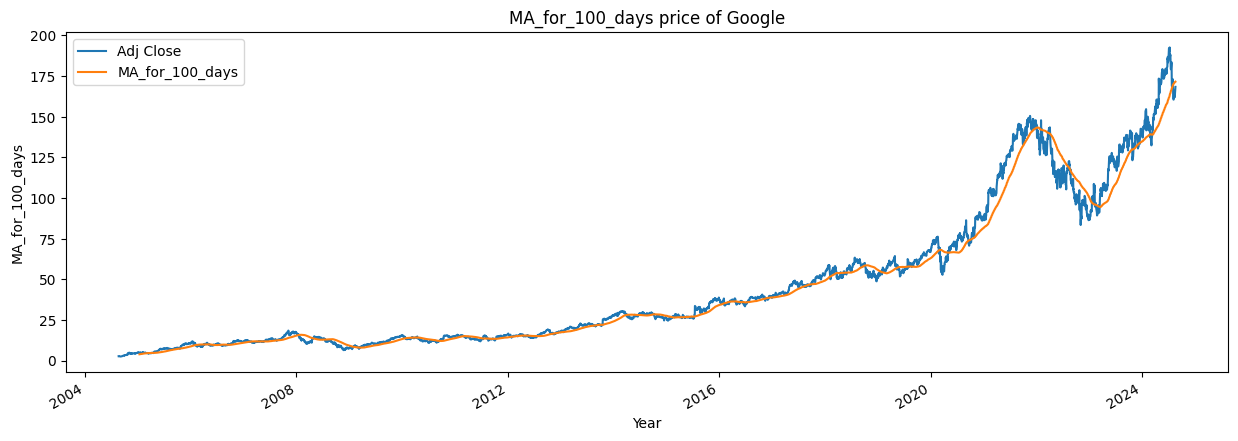

In [ ]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[["Adj Close","MA_for_100_days"]],"MA_for_100_days")

In [ ]:
google_data["percent_change"] = google_data['Adj Close'].pct_change()
google_data = google_data.dropna()
google_data.describe()


,Open,High,Low,Close,Adj Close,Volume,MA_for_100_days,percent_change
count,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4.934000e+03,4934.000000,4934.000000
mean,46.430180,46.921303,45.968108,46.454590,46.403785,1.103503e+08,44.694549,0.000897
std,43.766367,44.256895,43.340863,43.807317,43.763505,1.426062e+08,41.803950,0.018935
min,4.366135,4.443345,4.298140,4.358414,4.353460,1.584340e+05,3.863779,-0.116091
25%,13.302452,13.411045,13.147283,13.295727,13.280614,2.703714e+07,13.287005,-0.007748
50%,27.700560,27.828597,27.377107,27.671778,27.640325,5.236065e+07,27.683909,0.000770
75%,61.292624,61.759001,60.646876,61.228499,61.158904,1.345143e+08,58.410827,0.009895
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09,171.594331,0.199915


In [ ]:
#Convert adj closee price betweeen [0-1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(google_data[['Adj Close']])

In [ ]:
len(scaled_data)

4934

In [ ]:
x_data = []
y_data = []
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i,0])

import numpy as np
x_data = np.array(x_data)
y_data = np.array(y_data)


In [ ]:
x_data

array([[[0.00245075],
        [0.00269384],
        [0.00268724],
        ...,
        [0.01493044],
        [0.01491723],
        [0.01390786]],

       [[0.00269384],
        [0.00268724],
        [0.00330026],
        ...,
        [0.01491723],
        [0.01390786],
        [0.01531886]],

       [[0.00268724],
        [0.00330026],
        [0.00381947],
        ...,
        [0.01390786],
        [0.01531886],
        [0.01560687]],

       ...,

       [[0.78193793],
        [0.77864918],
        [0.78156664],
        ...,
        [0.8475358 ],
        [0.85805055],
        [0.83733967]],

       [[0.77864918],
        [0.78156664],
        [0.78283973],
        ...,
        [0.85805055],
        [0.83733967],
        [0.84339362]],

       [[0.78156664],
        [0.78283973],
        [0.7845371 ],
        ...,
        [0.83733967],
        [0.84339362],
        [0.85173113]]])

In [ ]:
spliting_len = int(len(x_data)*0.7)
x_train = x_data[:spliting_len]
y_train = y_data[:spliting_len]
x_test = x_data[spliting_len:]
y_test = y_data[spliting_len:]

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3383, 100, 1)
(1451, 100, 1)
(3383,)
(1451,)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 4.2921e-05
Epoch 2/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 4.1573e-05
Epoch 3/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 2.4318e-05
Epoch 4/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 3.4243e-05
Epoch 5/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 2.1383e-05
Epoch 6/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 2.2970e-05
Epoch 7/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 1.9099e-05
Epoch 8/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 1.7271e-05
Epoch 9/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 1.9732e-05
Epoch 10/10
3383/3383 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - loss: 1.7071e-05


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(1451, 1)

In [ ]:
y_test

array([0.25964815, 0.25234923, 0.25166495, ..., 0.84339362, 0.85173113,
       0.87116746])

In [ ]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_test_inv.shape
#

(1451, 1)

In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test_inv)**2)
rmse


7.859421328459831

In [ ]:
plotting_data = pd.DataFrame({
    "Actual":y_test_inv.reshape(-1),
    "Predicted":predictions.reshape(-1)
},index=google_data.index[spliting_len+100:])
plotting_data.head()


,Actual,Predicted
Date,,
2018-11-09,53.246906,54.805061
2018-11-12,51.872471,54.115692
2018-11-13,51.743618,52.730473
2018-11-14,52.123684,52.389542
2018-11-15,53.174988,52.661591


<Figure size 640x480 with 0 Axes>

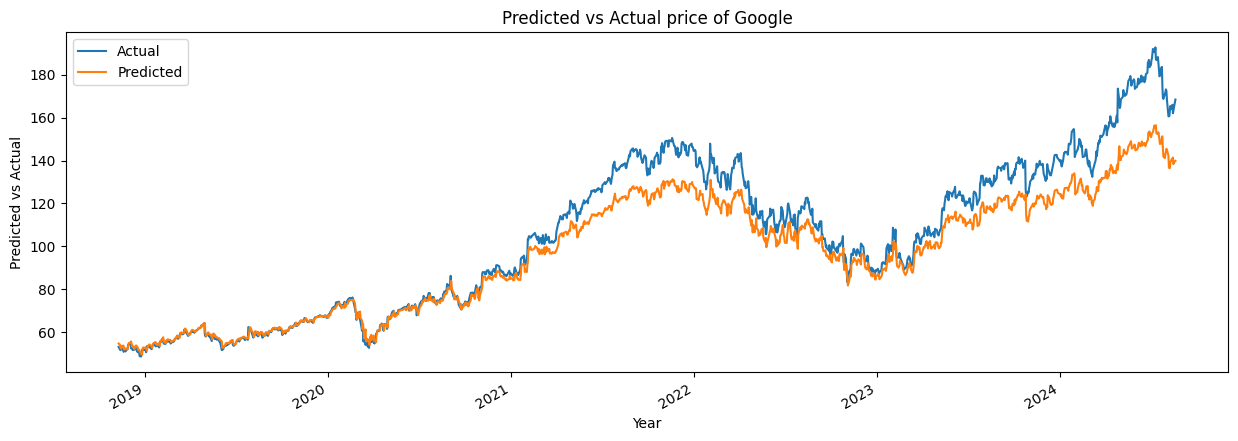

In [ ]:
plot_graph((15,5),plotting_data,"Predicted vs Actual")
#

<Figure size 640x480 with 0 Axes>

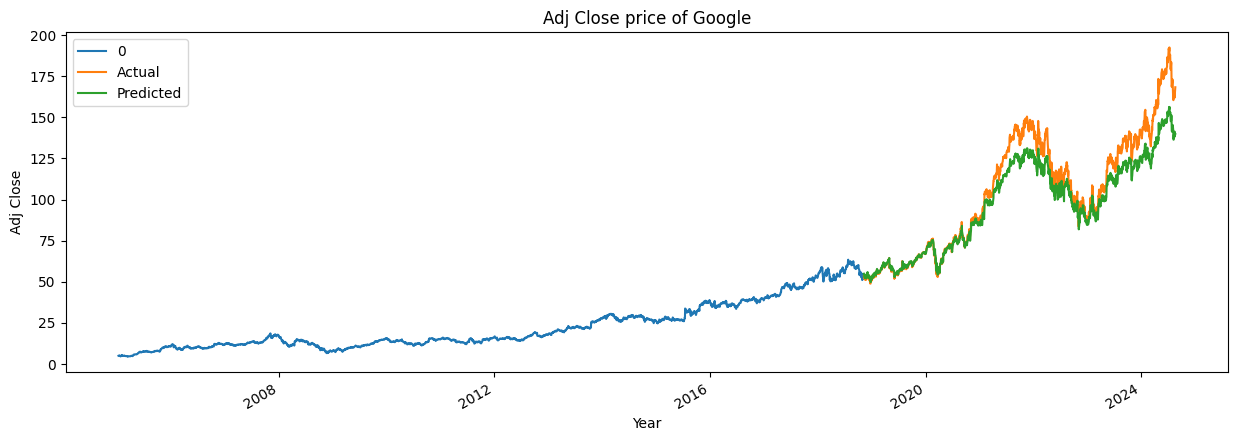

In [ ]:
plot_graph((15,5),pd.concat([google_data["Adj Close"][:spliting_len+100],plotting_data],axis = 0),"Adj Close")
#

In [ ]:
model.save('google_stock_prediction.keras')